# Multi Layer Perceptron

In [40]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf


# Load data set
tips = sns.load_dataset("tips")

# Convert categorical variables into dummy variables
tips= pd.get_dummies(tips , drop_first = True)

# Split the data into x and y
x = tips.drop('tip' , axis=1)
y = tips['tip']

# Split the data into Trainand test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Feature scaling

scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)


# Build the model

model = tf.keras.models.Sequential([tf.keras.layers.Dense(64, activation='relu',input_shape=(x_train.shape[1],)),
                                    tf.keras.layers.Dense(32 , activation = 'relu'),
                                    tf.keras.layers.Dense(1)])

# compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Fit the model
model.fit(x_train, y_train, epochs=10, batch_size = 32,verbose=1)

# Evaluate the model
loss = model.evaluate(x_test , y_test , verbose=0)
print('Loss : ', loss)

Epoch 1/10
6/6 [==============================] - 2s 7ms/step - loss: 12.0392 - mae: 3.1261
Epoch 2/10
6/6 [==============================] - 0s 6ms/step - loss: 9.7260 - mae: 2.7226
Epoch 3/10
6/6 [==============================] - 0s 9ms/step - loss: 7.8818 - mae: 2.3522
Epoch 4/10
6/6 [==============================] - 0s 6ms/step - loss: 6.2826 - mae: 2.0106
Epoch 5/10
6/6 [==============================] - 0s 15ms/step - loss: 5.0531 - mae: 1.7051
Epoch 6/10
6/6 [==============================] - 0s 6ms/step - loss: 4.0414 - mae: 1.4763
Epoch 7/10
6/6 [==============================] - 0s 5ms/step - loss: 3.2407 - mae: 1.2835
Epoch 8/10
6/6 [==============================] - 0s 4ms/step - loss: 2.6995 - mae: 1.1475
Epoch 9/10
6/6 [==============================] - 0s 3ms/step - loss: 2.2801 - mae: 1.0583
Epoch 10/10
6/6 [==============================] - 0s 4ms/step - loss: 1.9682 - mae: 1.0106
Loss :  [1.3894002437591553, 0.8944087624549866]


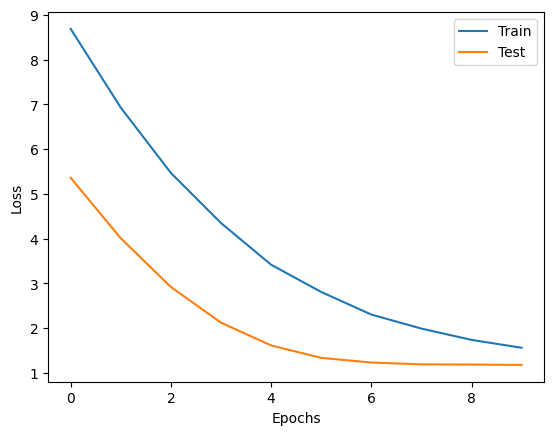

In [41]:
# Build the model
model = tf.keras.models.Sequential([tf.keras.layers.Dense(64 , activation ='relu',input_shape=(x_train.shape[1],)),
                                    tf.keras.layers.Dense(32 , activation ='relu'),
                                    tf.keras.layers.Dense(1)])

# Compiile the  model
model.compile(optimizer = 'adam' , loss = 'mse')


# Train the model
history = model.fit(x_train , y_train ,epochs=10, batch_size = 32 , verbose=0 , validation_data=(x_test, y_test))

# Evaluate the model
loss = model.evaluate(x_test , y_test , verbose=0)

# Plot the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


Epoch 1/100
6/6 [==============================] - 2s 68ms/step - loss: 10.9750 - val_loss: 7.3946
Epoch 2/100
6/6 [==============================] - 0s 17ms/step - loss: 9.2622 - val_loss: 6.0433
Epoch 3/100
6/6 [==============================] - 0s 18ms/step - loss: 7.7593 - val_loss: 4.8437
Epoch 4/100
6/6 [==============================] - 0s 18ms/step - loss: 6.3850 - val_loss: 3.8168
Epoch 5/100
6/6 [==============================] - 0s 18ms/step - loss: 5.1822 - val_loss: 2.9434
Epoch 6/100
6/6 [==============================] - 0s 18ms/step - loss: 4.0637 - val_loss: 2.2676
Epoch 7/100
6/6 [==============================] - 0s 17ms/step - loss: 3.1859 - val_loss: 1.8036
Epoch 8/100
6/6 [==============================] - 0s 18ms/step - loss: 2.5707 - val_loss: 1.5398
Epoch 9/100
6/6 [==============================] - 0s 17ms/step - loss: 2.1096 - val_loss: 1.4375
Epoch 10/100
6/6 [==============================] - 0s 18ms/step - loss: 1.8111 - val_loss: 1.4073
Epoch 11/100
6/6 [

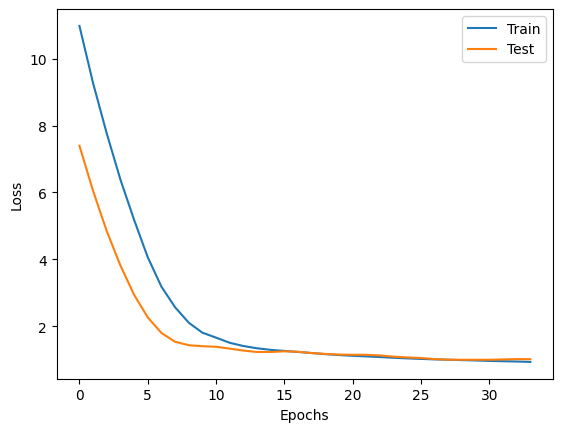

In [51]:
from tensorflow.keras.callbacks import EarlyStopping

# Build the model
model = tf.keras.models.Sequential([tf.keras.layers.Dense(64 , activation ='relu',input_shape=(x_train.shape[1],)),
                                    tf.keras.layers.Dense(32 , activation ='relu'),
                                    tf.keras.layers.Dense(1)])

# Compiile the  model
model.compile(optimizer = 'adam' , loss = 'mse')

# Define Early stopping
early_stop =EarlyStopping(patience=5)

# Train the model for call back
history = model.fit(x_train,y_train,epochs=100 ,batch_size=32 , verbose=1 , validation_data = (x_test , y_test),callbacks=[early_stop])

# Evaluate the model
Loss = model.evaluate(x_test ,y_test ,verbose=0)
Loss

# Plot the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')    
plt.show()